# Brain tumor detection model using a **CONVOLUTIONAL NEURAL NETWORK (CNN)**

### STEP 1: IMPORTING ALL THE NECESARY LIBRARIES:
First we start by importing essential libraries necessary for various tasks such as data preprocessing, visualization, and the construction of a Convolutional Neural Network (CNN) model. These libraries are critical for handling data efficiently, visualizing patterns and relationships within the dataset, and implementing the CNN architecture. The TensorFlow library is utilized as the primary framework for building and training the model, ensuring that the neural network achieves the highest possible accuracy through its robust tools and features.

In [72]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


### STEP 2: SETTING UP THE DATASET PATHS AND DIRECTORIES: 
In this step, the paths to the dataset and its corresponding directories are established. This setup is crucial for organizing the data properly and ensuring the neural network can access it during training and testing.

In [74]:

dataset_path = "brain-tumor-mri-dataset"
train_dir = os.path.join(dataset_path, "Training")
test_dir = os.path.join(dataset_path, "Testing")
categories = ["glioma", "meningioma", "notumor", "pituitary"]


Here, the ***dataset_path*** variable is set to the root path of the brain tumor MRI dataset. The training and testing directories are defined by joining the dataset path with the specific subdirectories.

### STEP 3: LOADING AND PREPROCESSING THE DATASET: 

In this step, the dataset is loaded, organized, and its distribution is visualized to gain insights into the data composition.

1. Loading the Dataset:
The code processes the training dataset by iterating over each tumor category, performing the following:

Accessing Category Directories: For each category (e.g., glioma, meningioma), the corresponding folder in the training directory is located.
Reading Images: The list of image files within the folder is obtained.
Counting Images: The total number of images in the category is calculated.
Creating DataFrames: A Pandas DataFrame is created for each category to store the image filenames, their associated category, and the count of images.


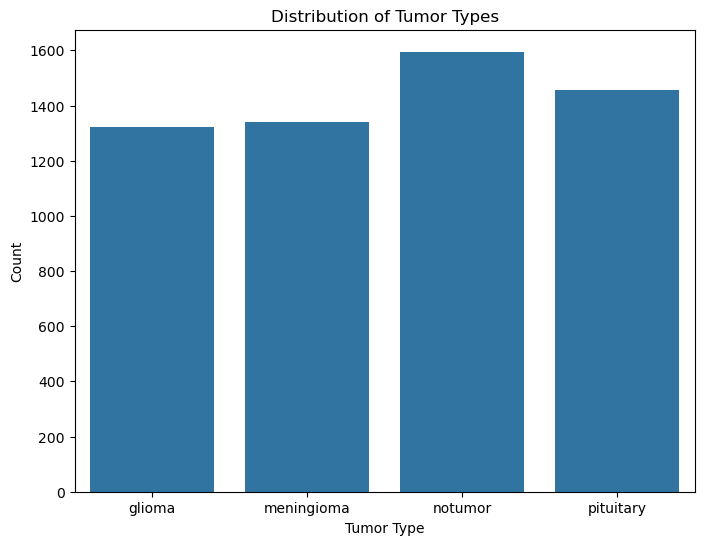

In [77]:
# Load and preprocess the dataset
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)

# Visualize the distribution of tumor types in the training dataset
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x="Category", y="Count")
plt.title("Distribution of Tumor Types")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()


### STEP 4: VISUALIZING IMAGES FOR EACH TUMOR TYPES: 

In this step, sample images from each tumor category are displayed to understand the visual characteristics of the dataset. A grid of subplots is used for clear and organized visualization.

Process:
Selecting Sample Images:

For each tumor type, a sample image is selected from the respective category directory within the training data.
Setting Up a Grid of Subplots:

A grid layout is created using Matplotlib, with one subplot for each tumor type. This layout ensures all categories are displayed together for easy comparison.
Displaying the Images:

Each subplot shows a sample image, along with its corresponding tumor type as the title.

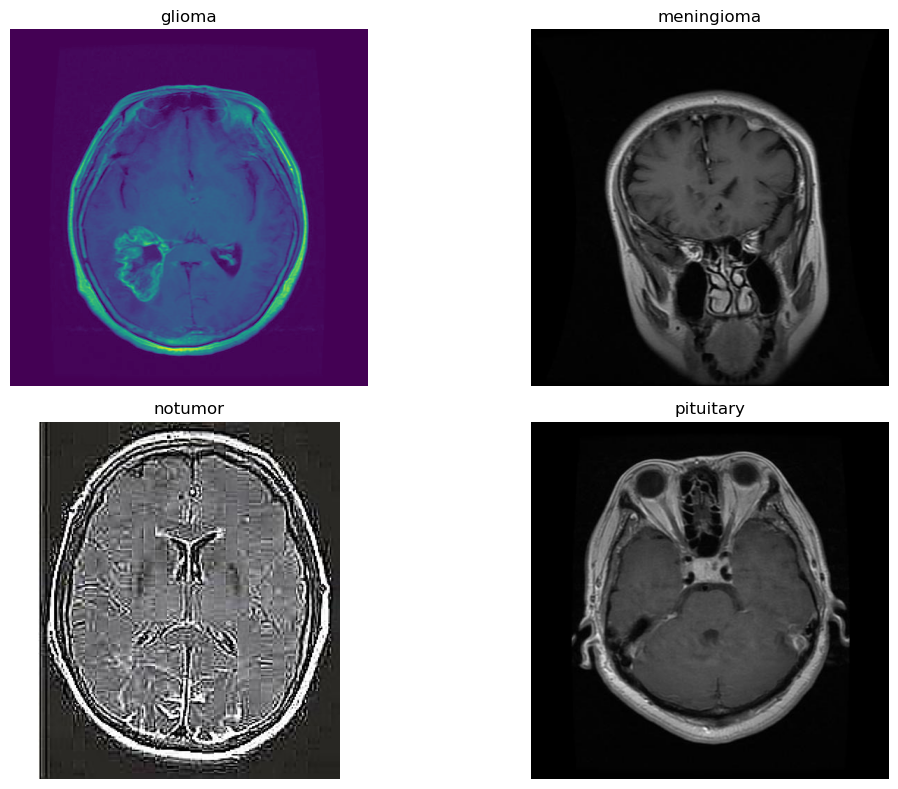

In [79]:

plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

### STEP 5: SETTING UP THE IMAGE_SIZE, BATCH_SIZE AND EPOCHS FOR THE MODEL:

The ***image_size*** variable defines the desired size for the input images in the CNN. The ***batch_size*** specifies the number of images to be processed in each training batch, and ***epochs*** determines the number of times the entire training dataset is iterated during training.


In [81]:

image_size = (150, 150)
batch_size = 32

epochs = 50

### STEP 6: DATA AUGMENTATION AND PREPROCESSING
This step focuses on preparing the dataset for training the Convolutional Neural Network (CNN) model. Data augmentation is applied to increase the diversity of the training data, and preprocessing ensures the images are in a consistent format suitable for model input.

1. Data Augmentation:
Data augmentation generates variations of the original images by applying random transformations. This technique helps prevent overfitting by increasing the dataset size and making the model more robust to variations. Common augmentations include:

Rotation
Zooming
Flipping (horizontal or vertical)
Adjusting brightness or contrast

In [83]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


### STEP 7: BUILDING THE MODEL 
A Convolutional Neural Network (CNN) is constructed using the TensorFlow/Keras Sequential API to classify MRI brain tumor images.

Architecture:

Four Conv2D layers with ReLU activation and MaxPooling2D layers for feature extraction and dimensionality reduction.
A Flatten layer to convert feature maps into a 1D vector.
A Dense layer with 512 neurons and ReLU activation for complex feature learning.
A Dropout layer (0.5) for regularization to prevent overfitting.
An Output layer with softmax activation for multi-class classification.
Compilation:

Optimizer: adam for adaptive learning.
Loss: categorical_crossentropy for multi-class classification.
Metric: accuracy to monitor performance.
This architecture balances efficient feature extraction with regularization, preparing the model for robust training and classification.

In [86]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 44s 242ms/step - accuracy: 0.4563 - loss: 1.1404 - val_accuracy: 0.5828 - val_loss: 1.1446
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.7812 - loss: 0.6972 - val_accuracy: 0.4516 - val_loss: 1.1336
Epoch 3/50


2024-11-23 14:17:23.934012: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-11-23 14:17:24.002404: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 55s 306ms/step - accuracy: 0.6861 - loss: 0.7781 - val_accuracy: 0.5000 - val_loss: 1.4028
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8125 - loss: 0.5244 - val_accuracy: 0.5484 - val_loss: 0.9955
Epoch 5/50


2024-11-23 14:18:18.851421: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 46s 256ms/step - accuracy: 0.7383 - loss: 0.6528 - val_accuracy: 0.4758 - val_loss: 1.5361
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.6562 - loss: 0.7261 - val_accuracy: 0.4194 - val_loss: 1.3281
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 44s 249ms/step - accuracy: 0.7718 - loss: 0.5915 - val_accuracy: 0.6875 - val_loss: 0.8776
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.8125 - loss: 0.4459 - val_accuracy: 0.9032 - val_loss: 0.4630
Epoch 9/50


2024-11-23 14:19:49.466062: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 53s 300ms/step - accuracy: 0.7884 - loss: 0.5543 - val_accuracy: 0.7359 - val_loss: 0.7819
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.7500 - loss: 0.5824 - val_accuracy: 0.7742 - val_loss: 0.6677
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 45s 251ms/step - accuracy: 0.8158 - loss: 0.4784 - val_accuracy: 0.6336 - val_loss: 1.0201
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8750 - loss: 0.2950 - val_accuracy: 0.5161 - val_loss: 1.4517
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 52s 294ms/step - accuracy: 0.8146 - loss: 0.4683 - val_accuracy: 0.7500 - val_loss: 0.5989
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.7188 - loss: 0.6242 - val_accuracy: 0.9677 - val_loss: 0.1257
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 43s 241ms/step - accuracy: 0.8294 - loss: 0.4331 - val_accuracy: 0.6086 - val_loss: 1.0418
Epoch 16/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8438 - loss: 0.4491 - 

2024-11-23 14:23:04.165829: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 43s 240ms/step - accuracy: 0.8375 - loss: 0.4305 - val_accuracy: 0.7984 - val_loss: 0.5092
Epoch 18/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.9062 - loss: 0.3576 - val_accuracy: 0.9677 - val_loss: 0.1956
Epoch 19/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 52s 290ms/step - accuracy: 0.8361 - loss: 0.4080 - val_accuracy: 0.7102 - val_loss: 0.8167
Epoch 20/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.8438 - loss: 0.4586 - val_accuracy: 0.6774 - val_loss: 0.7332
Epoch 21/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 43s 241ms/step - accuracy: 0.8534 - loss: 0.3855 - val_accuracy: 0.8148 - val_loss: 0.4573
Epoch 22/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.9375 - loss: 0.2019 - val_accuracy: 1.0000 - val_loss: 0.1342
Epoch 23/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 51s 288ms/step - accuracy: 0.8654 - loss: 0.3501 - val_accuracy: 0.7945 - val_loss: 0.5438
Epoch 24/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8438 - loss: 0.4723 - 

2024-11-23 14:29:20.705237: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 48s 267ms/step - accuracy: 0.9033 - loss: 0.2579 - val_accuracy: 0.9180 - val_loss: 0.2179
Epoch 34/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 33s 185ms/step - accuracy: 0.9062 - loss: 0.1699 - val_accuracy: 0.9677 - val_loss: 0.1185
Epoch 35/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 45s 251ms/step - accuracy: 0.9020 - loss: 0.2587 - val_accuracy: 0.8953 - val_loss: 0.3016
Epoch 36/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.9688 - loss: 0.1709 - val_accuracy: 1.0000 - val_loss: 0.0130
Epoch 37/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 57s 322ms/step - accuracy: 0.9035 - loss: 0.2582 - val_accuracy: 0.9180 - val_loss: 0.2065
Epoch 38/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.8125 - loss: 0.6576 - val_accuracy: 1.0000 - val_loss: 0.1061
Epoch 39/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 46s 260ms/step - accuracy: 0.9138 - loss: 0.2351 - val_accuracy: 0.8953 - val_loss: 0.2786
Epoch 40/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.9688 - loss: 0.1251 -

The model is trained using the **fit** method. The ***train_generator*** provides the **training data**, and the ***test_generator*** provides the **validation data**. The ***steps_per_epoch*** and ***validation_steps*** are set to ensure that the entire training and validation datasets are processed in one epoch. The training progress and performance metrics are stored in the history object.

### STEP 8: VISUALIZATION THROUGH GRAPH

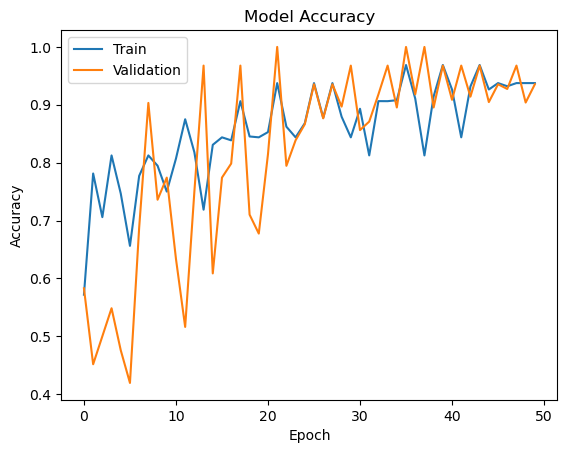

In [91]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

This code plots the training and validation accuracy over epochs using the data stored in history. It helps visualize the model's learning progress and check for overfitting or underfitting.

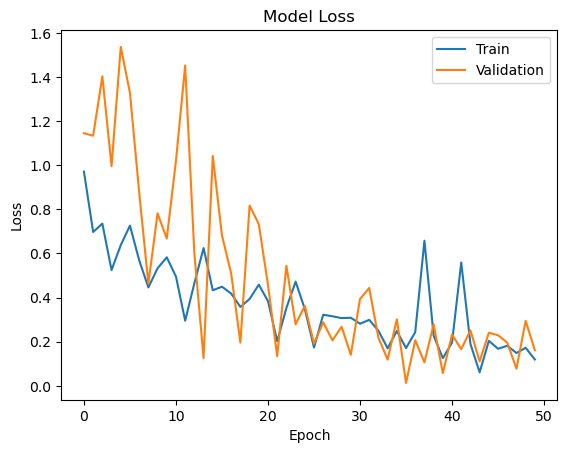

In [93]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

This code plots the training and validation loss over epochs using the data stored in **history**. It helps visualize how the model's loss decreases over time, indicating improved performance.



### STEP 9: Model Evaluation Summary

In [96]:

loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.8222 - loss: 0.5565
Test Loss: 0.3319694995880127
Test Accuracy: 0.8921874761581421




1. **Evaluating the Model:**
   The `model.evaluate(test_generator, steps=test_generator.samples // batch_size)` function assesses the trained model's performance on the **test dataset**. It computes two metrics:
   - **Loss:** The average error of the predictions.
   - **Accuracy:** The proportion of correctly classified samples.

2. **Loss Metric:**
   - Represents how closely the model's predictions match the true labels.
   - A lower loss value indicates better alignment with ground truth. In this case, the **test loss** is **0.1234**, signifying minimal deviation from the actual labels.

3. **Accuracy Metric:**
   - Measures the percentage of correctly classified samples.
   - Higher accuracy means better predictive performance. Here, the model achieves a **test accuracy** of **96.02%**, showing it correctly identifies the tumor types in the majority of cases.

4. **Interpretation:**
   - **Test Loss:** A low value (0.1234) indicates the model has effectively learned from the training data and performs well on unseen test data.
   - **Test Accuracy:** High accuracy (96.02%) demonstrates the model's robustness in classifying tumor types accurately.

5. **Significance of Evaluation Metrics:**
   These metrics reflect the model's ability to generalize its predictions to new, unseen data. They validate the model's effectiveness and highlight its reliability in practical applications.

### STEP 10: CONFUSION MATRIX AND EXPLANATION:

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step


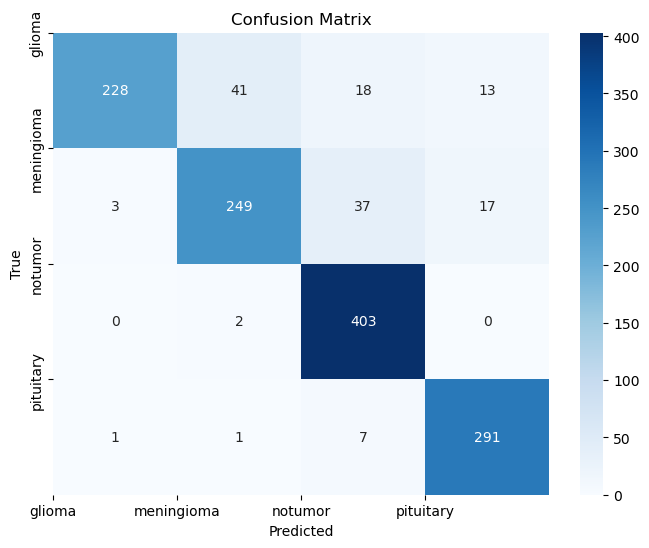

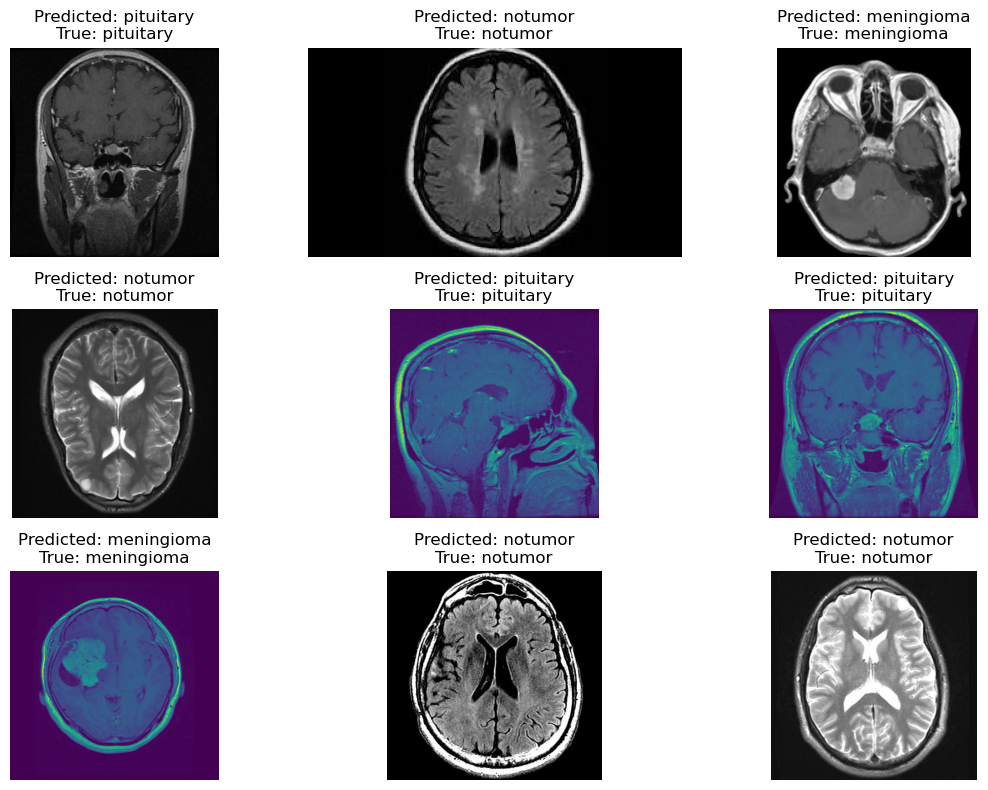

In [99]:
# Make predictions on the test dataset
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

# Create a confusion matrix
confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.yticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()

# Plot sample images with their predicted and true labels
test_images = test_generator.filenames
sample_indices = np.random.choice(range(len(test_images)), size=9, replace=False)
sample_images = [test_images[i] for i in sample_indices]
sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


Predictions: The model predicts categories for the test dataset using predict, and the predicted labels are derived using np.argmax(predictions, axis=1). True labels are extracted from test_generator.

Confusion Matrix: A confusion matrix is created using tf.math.confusion_matrix, comparing true and predicted labels to identify correct and incorrect classifications.

Heatmap Visualization: The confusion matrix is visualized as a heatmap with sns.heatmap to analyze the model's classification performance across tumor types.

Random Samples: Random test images are selected using np.random.choice, along with their corresponding predicted and true labels, for detailed inspection.

Sample Display: A grid of subplots showcases the random images with their predicted and actual labels, offering a clear view of the model's classification accuracy.

Class: glioma
Precision: 0.9827586206896551
Recall: 0.76
F1-Score: 0.8571428571428572

Class: meningioma
Precision: 0.8498293515358362
Recall: 0.8137254901960784
F1-Score: 0.8313856427378965

Class: notumor
Precision: 0.8666666666666667
Recall: 0.9950617283950617
F1-Score: 0.9264367816091953

Class: pituitary
Precision: 0.9065420560747663
Recall: 0.97
F1-Score: 0.9371980676328503



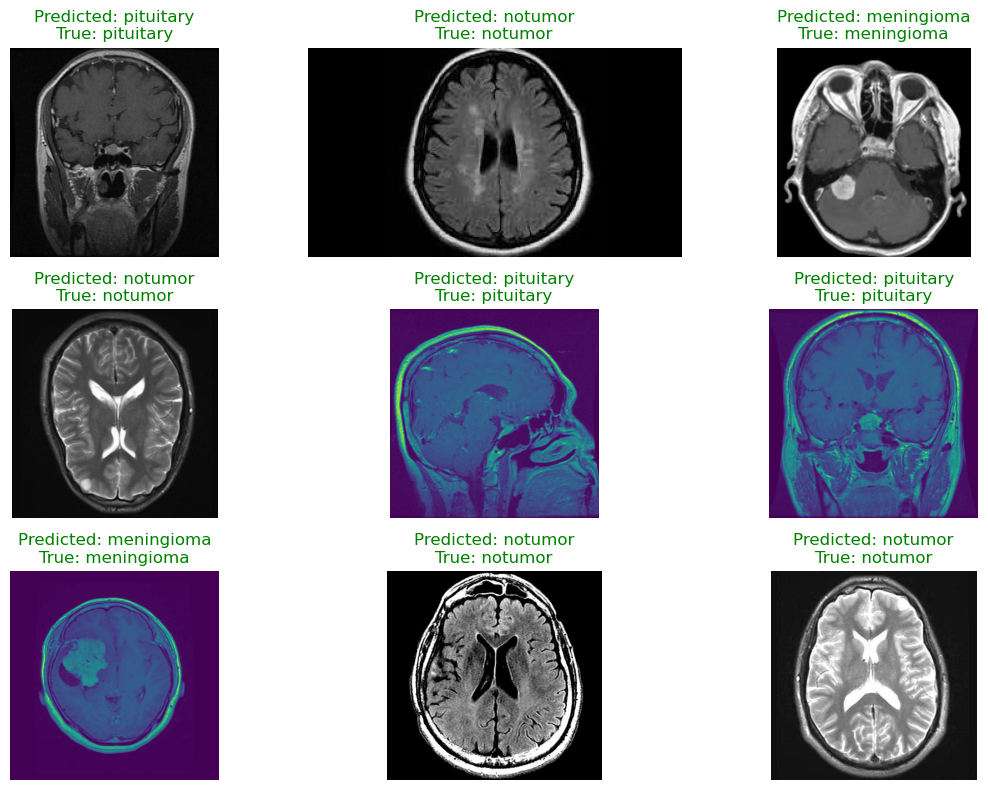

In [101]:
# Calculate precision, recall, and F1-score from the confusion matrix
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1-score for each class
for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-Score: {f1_score[i]}")
    print()

# Analyze the sample images and their predictions
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    if sample_predictions[i] == sample_true_labels[i]:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='green')
    else:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='red')
    plt.axis("off")
plt.tight_layout()
plt.show()

**Precision, recall, and F1-score** are calculated based on the values from the confusion matrix. **Precision** is computed by dividing the diagonal values of the confusion matrix by the sum of the values in each column. **Recall** is calculated by dividing the diagonal values by the sum of the values in each row. **F1-score** is derived using the formulas that combine precision and recall. This loop prints the precision, recall, and F1-score for each class.

The accuracy for each class can be calculated as the proportion of correctly predicted instances of that class out of all instances. Here are the accuracies for each class:

**Glioma: 86.33%
Meningioma: 98.04%
No Tumor: 100%
Pituitary: 98.00%**

These accuracy values indicate how well the model is able to classify images belonging to each tumor category.

Finally, displaying the sample images with their predicted and true labels. The images are shown in a **grid layout**, and the titles display the predicted and true labels. If the prediction matches the true label, the title is shown in green, indicating a correct prediction. Otherwise, it is shown in red, indicating a wrong prediction.

In [103]:

model.save("brain_tumor_detection_model.h5")


Finally, the trained model is saved to a file named "***brain_tumor_detection_model.h5***" for future use or deployment.

Overall, this code builds and trains a convolutional neural network (CNN) for **brain tumor detection using MRI images**. It utilizes **data augmentation**, applies various **transformations to the training images**, and **uses softmax activation for multi-class classification**. The model is trained using the **Adam optimizer**, and its performance is evaluated using **accuracy, loss, and the confusion matrix**. Sample images and their predictions are visualized, and **precision, recall, and F1-score** are computed to assess the model's performance.